https://mp.weixin.qq.com/s/-z4QaxgOcxSLAdionlzWLw

# 什么是回归
回归模型中通常有一个连续且无界的因变量。但是，自变量可以是连续的，离散的，甚至是像性别，国籍，品牌等分类数据。

通常用y表示因变量，x表示自变量。如果有两个或者多个自变量，可以用向量x=(x1, …, xr)表示。

# 线性回归的原理
* 单变量线性回归
* 多变量线性回归

## 回归方程
在对一组自变量x=(x1,…,xr)和因变量y进行回归时，我们假设y与x的关系：  
y=β0+β1x1+···+βrxr+ε。  
这个方程叫做回归方程。β0, β1,... ,βr是回归系数， ε是随机误差。

## 求解：最小二乘法

通常使用最小化残差平方和的方法来计算最优权重，即最小化  
`SSR=∑i(yi-f(xi))2`。这种方法叫做最小二乘法OLS。

## 评价回归模型

实际观测值yi的变化一部分由于自变量xi的变化导致的。但是实际观测值yi仍然会有无法用回归函数f(xi)解释的部分。





而决定系数R2，用来说明实际观测值yi中有多大程度可以由回归函数f(x)解释。R2越大，两者拟合程度越高，意味着观测值yi-xi数据组可以很好的契合回归函数f(x)。





R2=1时，即SSR=0，称作完全拟合，这意味着所有yi-xi可以完全匹配回归函数f(x)。

# 多项式回归
在2阶多变量的情形中，回归函数可以像这样：f(x1,x2)=b0+b1x1+b2x2+b3x12+b4x1x2+b5x22

# 在Python中实现线性回归



## 基于sklearn的单变量线性回归

In [1]:
import pandas as pd
import numpy as np
import tushare as ts
from sklearn.linear_model import LinearRegression

### 读取数据

In [3]:
# 使用tushare获取数据
# ts.set_token('5fd1639100f8a22b7f86e882e03192009faa72bae1ae93803e1172d5')
# pro = ts.pro_api()

# # 获取沪深300与中国平安股票2018年全年以及2019年前7个交易日的日线数据
# index_hs300 = pro.index_daily(ts_code='399300.SZ', start_date='20180101', end_date='20190110')
# index_hs300.to_pickle('data/index_hs300.pkl')
index_hs300 = pd.read_pickle('data/index_hs300.pkl')
index_hs300.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
0,399300.SZ,20190110,3072.6864,3077.4817,3092.5411,3062.5721,3078.4759,-5.7895,-0.1881,85271756.0,90206871.7
1,399300.SZ,20190109,3078.4759,3065.2307,3117.9614,3062.8474,3047.7035,30.7724,1.0097,107364350.0,117129678.9
2,399300.SZ,20190108,3047.7035,3049.8747,3055.5100,3038.5339,3054.3030,-6.5995,-0.2161,86170585.0,79628882.6
3,399300.SZ,20190107,3054.3030,3055.1535,3061.7490,3035.9123,3035.8741,18.4289,0.6070,101164359.0,105703940.7
4,399300.SZ,20190104,3035.8741,2940.1916,3036.8147,2935.8295,2964.8421,71.0320,2.3958,103318972.0,107141037.0


In [5]:
# stock_000001 = pro.query('daily', ts_code='000001.SZ', start_date='20180101', end_date='20190110', fields='ts_code, trade_date ,pct_chg')
# stock_000001.to_pickle('data/stock_000001.pkl')
stock_000001 = pd.read_pickle('data/stock_000001.pkl')
stock_000001.head()

,ts_code,trade_date,pct_chg
0,000001.SZ,20190110,1.6097
1,000001.SZ,20190109,2.8986
2,000001.SZ,20190108,-0.8214
3,000001.SZ,20190107,-0.1026
4,000001.SZ,20190104,5.0647


In [6]:
# 保留用于回归的数据，数据对齐
# join的inner参数用于剔除指数日线数据中中国平安无交易日的数据，比如停牌。
# 同时保留中国平安和指数的日收益率并分别命名两组列名y_stock, x_index，确定因变量和自变量
index_pct_chg = index_hs300.set_index('trade_date')['pct_chg']
stock_pct_chg = stock_000001.set_index('trade_date')['pct_chg']
df = pd.concat([stock_pct_chg, index_pct_chg], keys=['y_stock', 'x_index'], join='inner', axis=1, sort=True)
df.head()

,y_stock,x_index
trade_date,,
20180102,3.01,1.4028
20180103,-2.70,0.5870
20180104,-0.60,0.4237
20180105,0.38,0.2407
20180108,-2.56,0.5173


In [7]:
# 选中2018年的x，y数据作为现有数据进行线性回归
df_existing_data = df[df.index < '20190101']

In [8]:
# 注意：自变量x为pandas.DataFrame类型，其为二维数据结构，注意与因变量的pandas.Series数据结构的区别。也可以用numpy.array的.reshape((-1, 1))将数据结构改为二维数组。
x = df_existing_data[['x_index']]
y = df_existing_data['y_stock']

### 数据可视化

In [12]:
import seaborn as sns

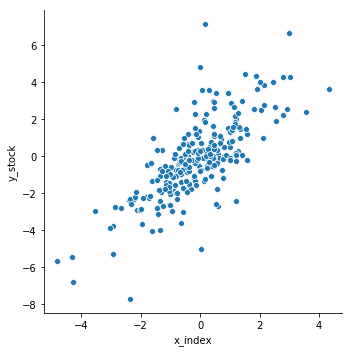

In [14]:
sns.relplot('x_index', 'y_stock', data=df_existing_data)

### 建立模型并拟合数据

In [9]:
model = LinearRegression()

In [10]:
model.fit(x, y)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 输出结果

In [11]:
r_sq = model.score(x, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.5674052646582468


In [17]:
from sklearn.metrics import r2_score
r2_score(y, model.predict(x))

0.5674052646582468

In [18]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 0.01762302497463815
slope: [1.18891167]


### 模型预测

In [19]:
# 选2019年前7个交易日的数据作为新数据进行预测
df_new_data = df[df.index > '20190101']

# 将自变量x，数据类型为DataFrame
new_x = df_new_data[['x_index']]

# 预测
y_pred = model.predict(new_x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-1.60619253 -0.17022502  2.86601759  0.73929241 -0.23930079  1.21806713
 -0.20601126]


In [20]:
b0, b1 = model.intercept_, model.coef_
y_pred = b0 + b1 * new_x
y_pred.columns = ['y_pred']

print('predicted response:', y_pred, sep='\n')


predicted response:
              y_pred
trade_date          
20190102   -1.606193
20190103   -0.170225
20190104    2.866018
20190107    0.739292
20190108   -0.239301
20190109    1.218067
20190110   -0.206011


## 基于sklearn的多变量线性回归

In [21]:
# 获取沪深300，中金细分有色指数，中金细分金融指数2018年全年日线数据
index_hs300 = pro.index_daily(ts_code='399300.SZ', start_date='20180101', end_date='20190110')
index_metal = ts.pro_bar(ts_code='000811.CSI', freq='D', asset='I', start_date='20180101', end_date='20190110')
index_finance = ts.pro_bar(ts_code='000818.CSI', freq='D', asset='I', start_date='20180101', end_date='20190110')


In [22]:
# 保留用于回归的数据，数据对齐
# join的inner参数用于剔除指数日线数据中交易日不匹配的数据
# 同时保留三个指数的日收益率并分别命名两组列名y_zz300, x1_metal，x2_finance，确定因变量和自变量
index_hs300_pct_chg = index_hs300.set_index('trade_date')['pct_chg']
index_metal_pct_chg = index_metal.set_index('trade_date')['pct_chg']
index_finance_pct_chg = index_finance.set_index('trade_date')['pct_chg']
df = pd.concat([index_hs300_pct_chg, index_metal_pct_chg, index_finance_pct_chg], keys=['y_hs300', 'x1_metal', 'x2_finance'], join='inner', axis=1, sort=True)


In [23]:
# 选中2018年的x1，x2，y数据作为现有数据进行多变量线性回归
df_existing_data = df[df.index < '20190101']

# 提取多变量x1，x2，其数据类型为DataFrame。另外numpy需要的数据结构可以通过np.array(x)查看，也是二维数组。
x = df_existing_data[['x1_metal', 'x2_finance']]
y = df_existing_data['y_hs300']


### 建立模型并拟合数据

In [24]:
model = LinearRegression().fit(x, y)

In [25]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8923741832489496
intercept: 0.0005333314305123321
slope: [0.30529472 0.64221632]


In [26]:
# 选中2019年前7个交易日的数据作为新数据进行预测
df_new_data = df[df.index > '20190101']
# 取自变量x1，x2
new_x = df_new_data[['x1_metal', 'x2_finance']]
# 预测
y_pred = model.predict(new_x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[-1.4716842   1.17891556  2.55034238  0.17701977 -0.81283822  0.57159138
 -0.19729323]


In [27]:
y_pred = model.intercept_ + (model.coef_ * new_x).sum(axis=1)
print('predicted response:', y_pred, sep='\n')


predicted response:
trade_date
20190102   -1.471684
20190103    1.178916
20190104    2.550342
20190107    0.177020
20190108   -0.812838
20190109    0.571591
20190110   -0.197293
dtype: float64


## 基于sklearn的多项式回归

In [28]:
from sklearn.preprocessing import PolynomialFeatures

### 读取数据

In [29]:
# 获取沪深300，中金细分金融指数2018年全年日线数据及2019年前7个交易日数据
index_hs300 = pro.index_daily(ts_code='399300.SZ', start_date='20180101', end_date='20190110')
index_finance = ts.pro_bar(ts_code='000818.CSI', freq='D', asset='I', start_date='20180101', end_date='20190110')

index_hs300_pct_chg = index_hs300.set_index('trade_date')['pct_chg']
index_finance_pct_chg = index_finance.set_index('trade_date')['pct_chg']
df = pd.concat([index_hs300_pct_chg, index_finance_pct_chg], keys=['y_hs300', 'x_finance'], join='inner', axis=1, sort=True)

df_existing_data = df[df.index < '20190101']

x = df_existing_data[['x_finance']]
y = df_existing_data['y_hs300']

### 自变量转换
这个步骤是多项式回归需要执行的步骤。由于多项式回归中有x2项，因此需要将x数组转换成x2并作为新的列。





有很多种转换方式，比如使用numpy中的insert()方法，或者pandas的DataFrame添加x2列。本例中使用的是PolynomialFeatures类：

In [30]:
transformer = PolynomialFeatures(degree=2, include_bias=False)


transformer是PolynomialFeatures类的实例，用于对自变量x进行转换。

PolynomialFeatures类中有以下几个可选参数：



 

degree：整型，默认为2。用于决定线性回归模型的阶数。

interaction_only：布尔值，默认为False。如果指定为True，那么就不会有xi2项，只有如xixj的交叉项。

include_bias：布尔值，默认为True。此参数决定是否将截距项添加为回归模型中的一项，即增加一列值为1的列。False表示不添加。





先将自变量x数据传入转换器transformer中：

In [31]:
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [35]:
x_ = transformer.transform(x)
x_[:5]

array([[ 1.6890000e+00,  2.8527210e+00],
       [-4.5800000e-02,  2.0976400e-03],
       [-3.2760000e-01,  1.0732176e-01],
       [ 1.3910000e-01,  1.9348810e-02],
       [ 5.2900000e-02,  2.7984100e-03]])

### 建立模型并拟合数据



In [36]:
model = LinearRegression().fit(x_, y)


In [37]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

coefficient of determination: 0.8133705974408868
intercept: -0.013957549345282719
coefficients: [ 0.86215933 -0.01444605]


## statsmodels库的线性回归应用

In [38]:
import statsmodels.api as sm

In [39]:
x = df_existing_data[['x1_metal', 'x2_finance']]
y = df_existing_data['y_hs300']

KeyError: "None of [Index(['x1_metal', 'x2_finance'], dtype='object')] are in the [columns]"